# Analysis of the StevenTime dataset


In [59]:
import pandas as pd
import numpy as np

# Define the path to the file
file_path = 'steventime.csv'

# Load the dataset with no header initially and then assign column names
column_names = ['Timestamp', 'DriveTime']
data = pd.read_csv(file_path, names=column_names, header=None)

# Convert 'Timestamp' to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Attempt to convert 'DriveTime' to numeric, replace non-numeric values with NaN
data['DriveTime'] = pd.to_numeric(data['DriveTime'], errors='coerce')

# Fill NaN values with the median drive time and convert to integers
median_drive_time = data['DriveTime'].median()
data['DriveTime'].fillna(median_drive_time, inplace=True)
data['DriveTime'] = data['DriveTime'].astype(int)

# The dataset is now ready for analysis
print(data.head())



            Timestamp  DriveTime
0 2023-11-26 15:00:49         88
1 2023-11-26 15:09:42         88
2 2023-11-26 15:12:24         88
3 2023-11-27 06:23:15         95
4 2023-11-27 14:30:11         93


/var/folders/lq/fq8zvtg15rv6j261lkstkm580000gn/T/ipykernel_94504/3013945113.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['DriveTime'].fillna(median_drive_time, inplace=True)


In [60]:
# Feature Engineering
data['DayOfWeek'] = data['Timestamp'].dt.dayofweek  # Monday=0, Sunday=6
data['HourOfDay'] = data['Timestamp'].dt.hour + data['Timestamp'].dt.minute / 60

# Since your requirement involves making predictions at 30-minute intervals,
# you might want to round 'HourOfDay' to the nearest half-hour for visualization purposes,
# though for modeling, the exact time might be more precise.

# For visualization purposes, let's assume you're ready to move on to model training and predictions.
# Assuming a model is trained, here's a pseudocode outline for how to create your visualizations:

for day in range(7):  # For each day of the week
    times = np.arange(5, 20.5, 0.5)  # From 5 AM to 8 PM, in 30-minute intervals
    predictions = []  # Replace this with your model's predictions
    # Plotting code here: you'd use matplotlib or seaborn to create bar charts of `predictions` for each `day`


Mean Absolute Error: 3.25
Mean Squared Error: 23.31


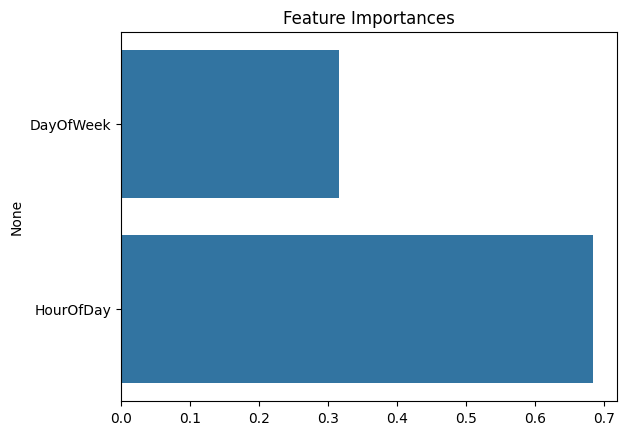

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the dataset
X = data[['DayOfWeek', 'HourOfDay']]  # Features
y = data['DriveTime']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')

# If you'd like to visualize the feature importances:
feature_importances = model.feature_importances_
sns.barplot(x=feature_importances, y=X.columns)
plt.title('Feature Importances')
plt.show()


/Users/paulin/Documents/GitHub/forecaster/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/var/folders/lq/fq8zvtg15rv6j261lkstkm580000gn/T/ipykernel_94504/2261943.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predictions[day, i] = prediction
/Users/paulin/Documents/GitHub/forecaster/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/var/folders/lq/fq8zvtg15rv6j261lkstkm580000gn/T/ipykernel_94504/2261943.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single elem

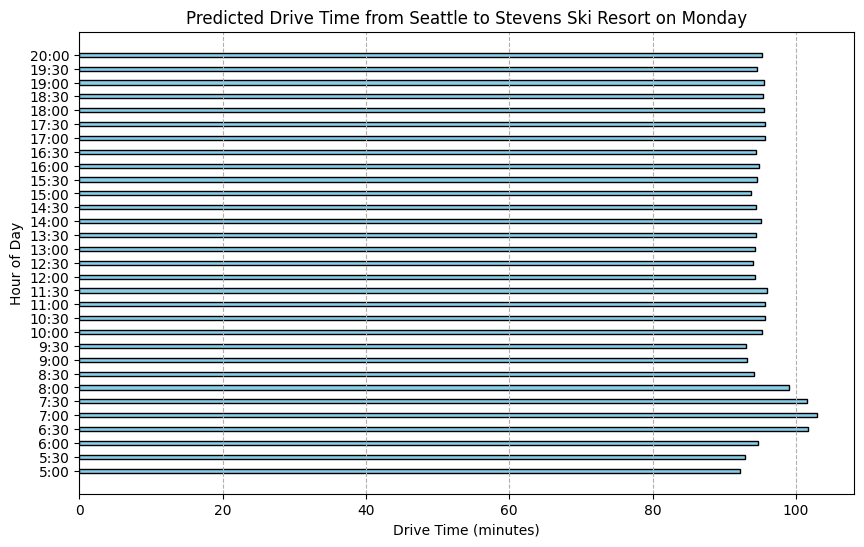

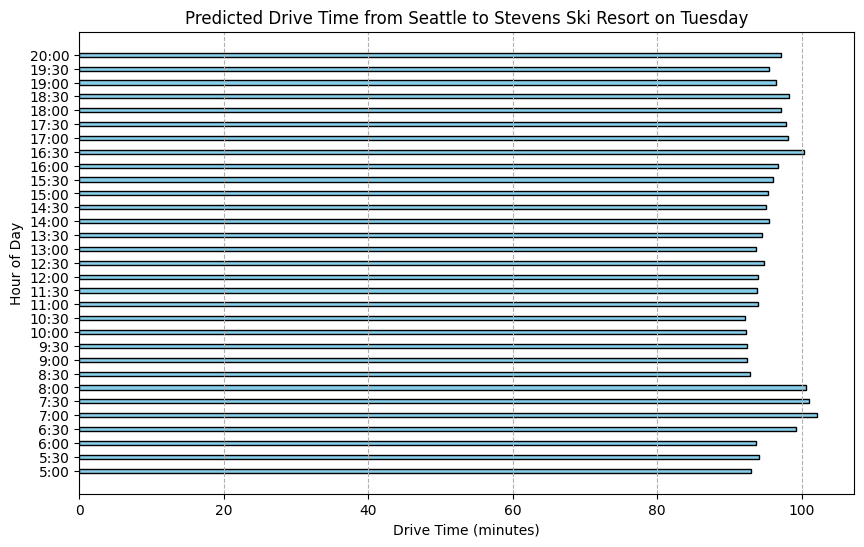

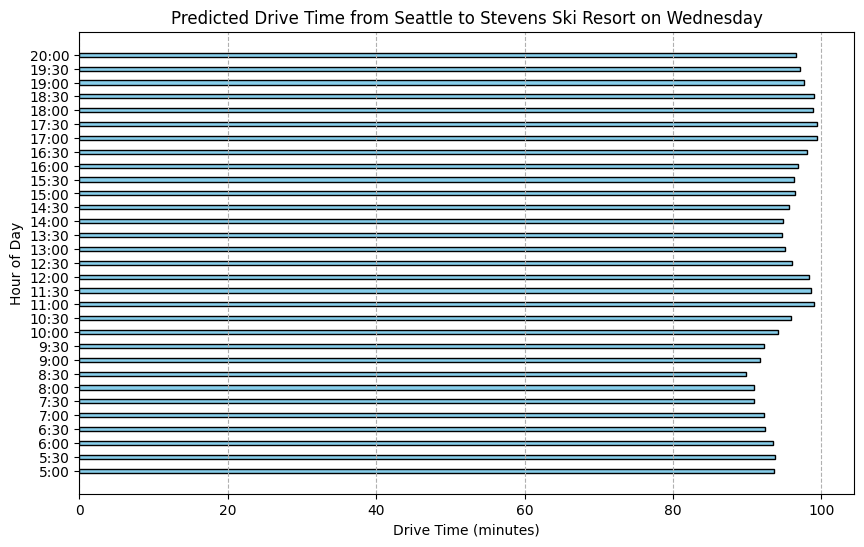

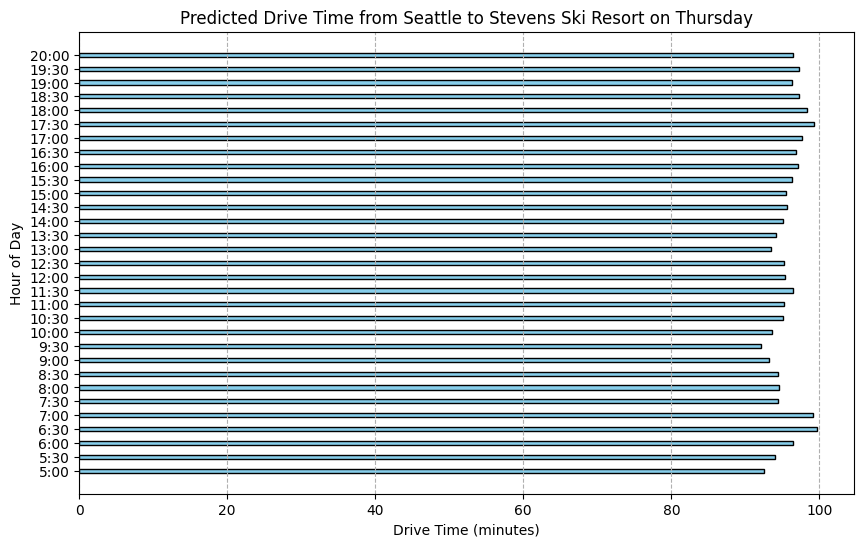

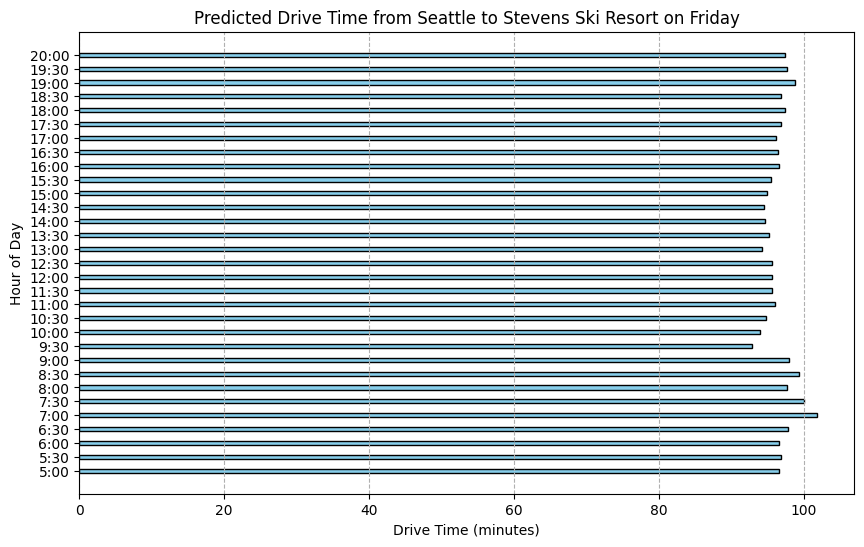

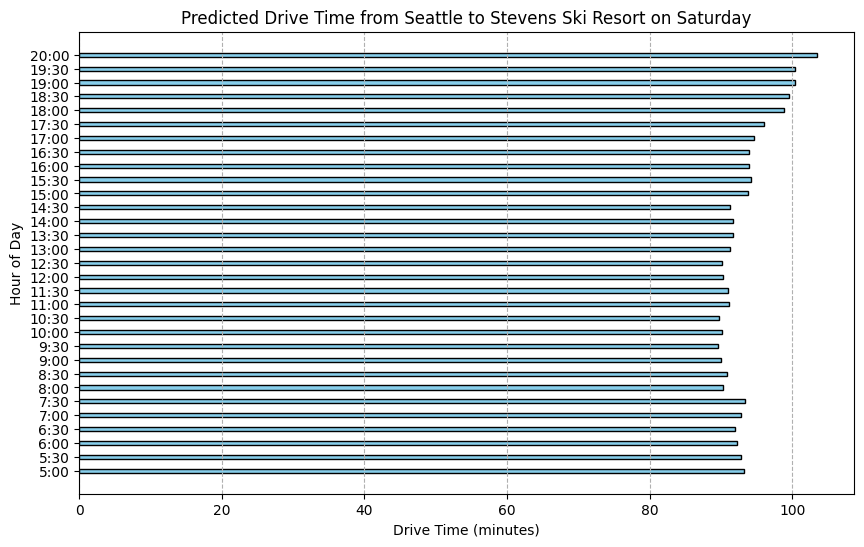

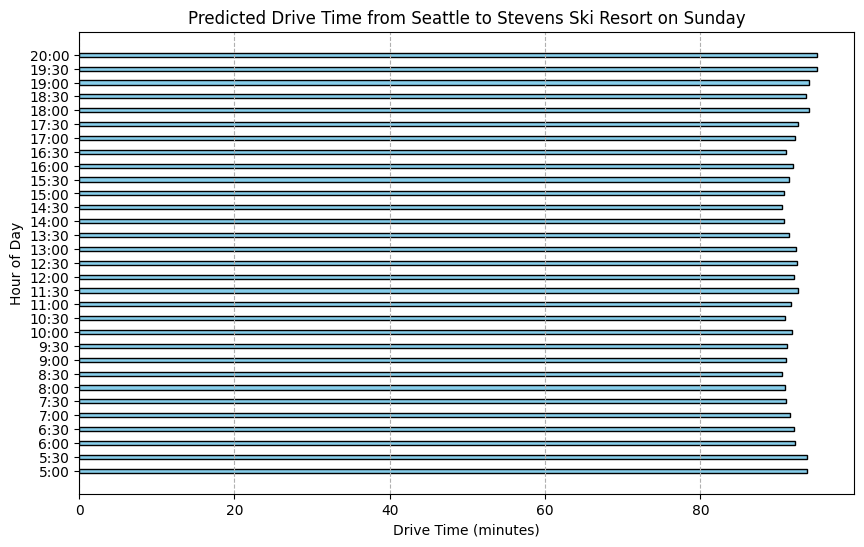

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'model' is your trained Random Forest model

# Generate prediction grid
hours = np.arange(5, 20.5, 0.5)  # From 5 AM to 8 PM, in 30-minute intervals
days_of_week = np.arange(7)  # 0 = Monday, 6 = Sunday

# Placeholder for predictions
predictions = np.zeros((len(days_of_week), len(hours)))

# Day names for titles
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert hours to formatted strings (e.g., '6:00', '6:30')
formatted_hours = [f"{int(hour)}:{'00' if hour % 1 == 0 else '30'}" for hour in hours]

# Predict drive time for each day and hour
for day in days_of_week:
    for i, hour in enumerate(hours):
        # Predict drive time
        prediction = model.predict([[day, hour]])
        predictions[day, i] = prediction

# Plotting
for day in days_of_week:
    plt.figure(figsize=(10, 6))
    plt.barh(formatted_hours, predictions[day], height=0.3, color='skyblue', edgecolor='black')
    
    plt.title(f'Predicted Drive Time from Seattle to Stevens Ski Resort on {day_names[day]}')
    plt.ylabel('Hour of Day')
    plt.xlabel('Drive Time (minutes)')
    plt.yticks(formatted_hours)

    plt.grid(axis='x', linestyle='--')
    plt.show()


/Users/paulin/Documents/GitHub/forecaster/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/var/folders/lq/fq8zvtg15rv6j261lkstkm580000gn/T/ipykernel_94504/2184841881.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predictions[day, i] = prediction
/Users/paulin/Documents/GitHub/forecaster/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/var/folders/lq/fq8zvtg15rv6j261lkstkm580000gn/T/ipykernel_94504/2184841881.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a singl

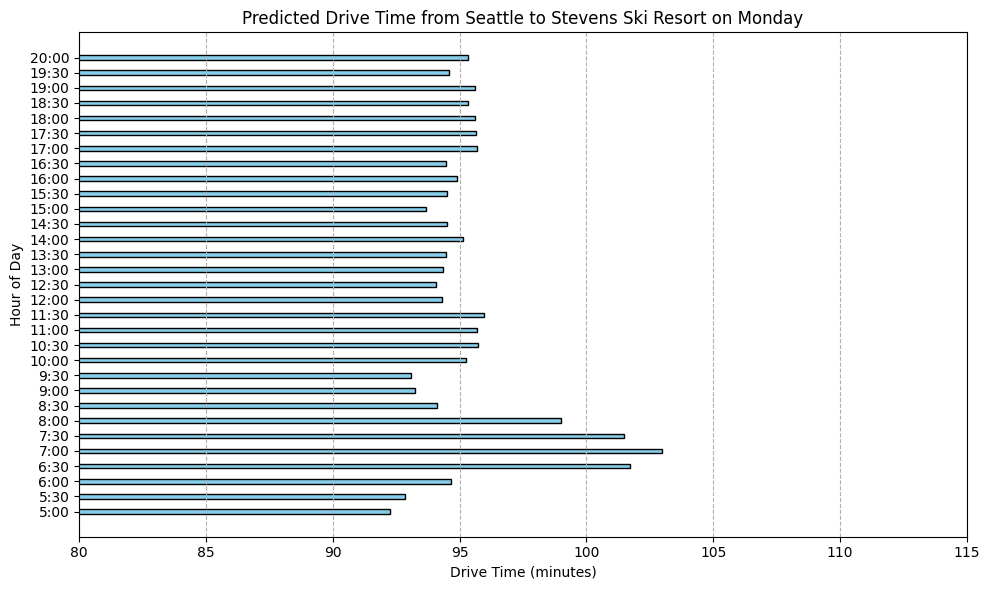

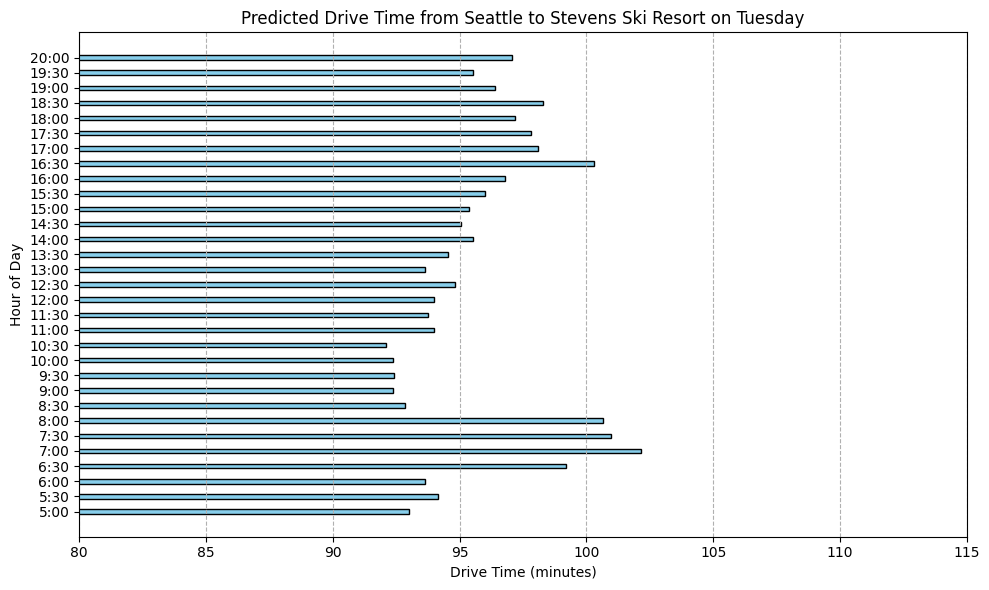

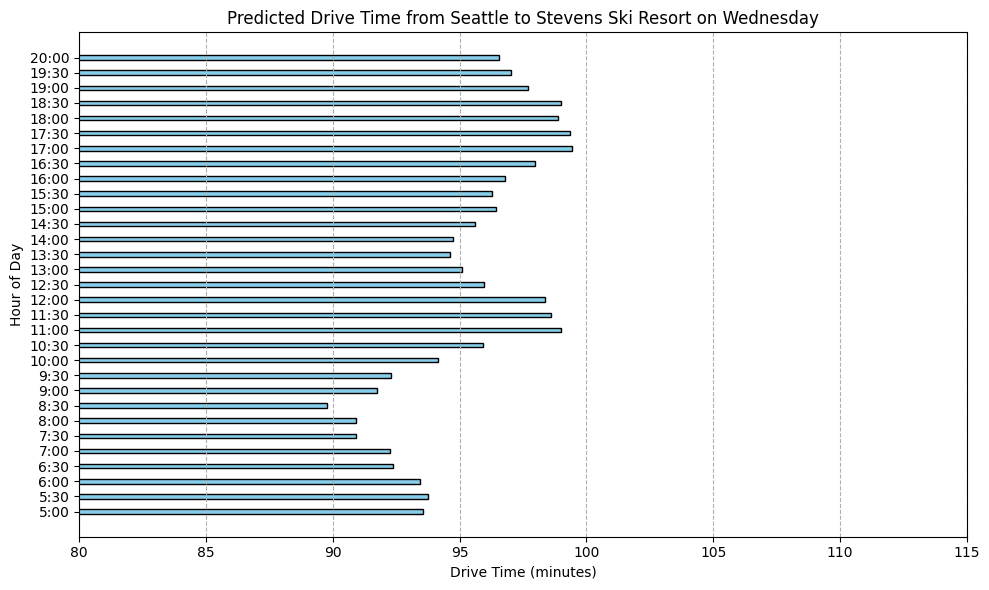

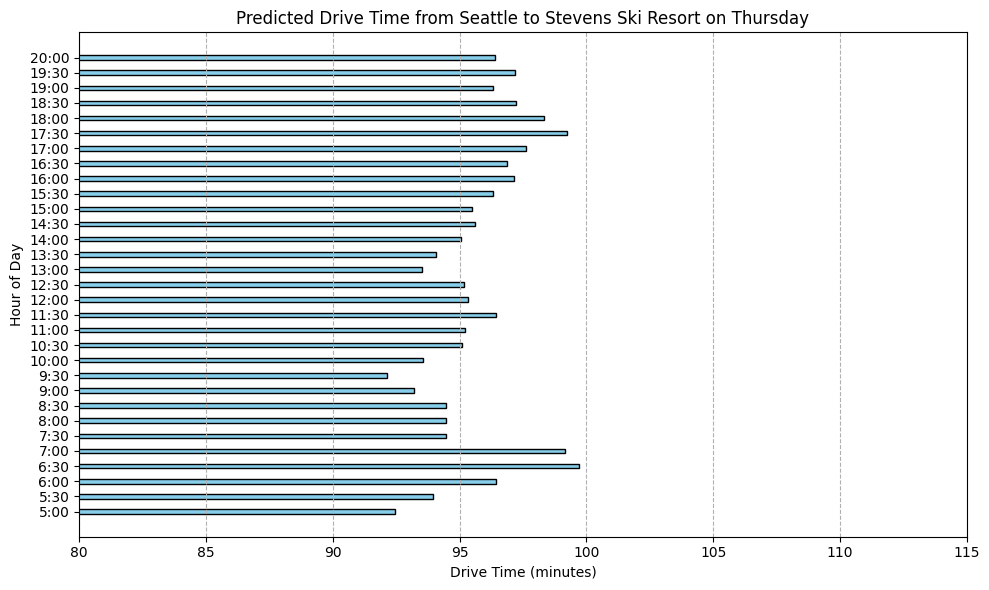

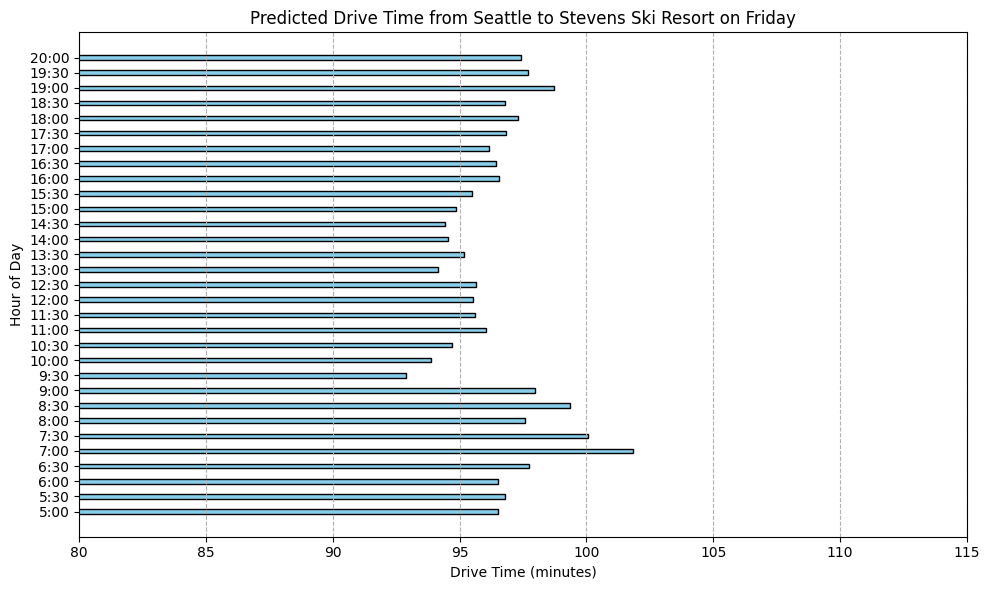

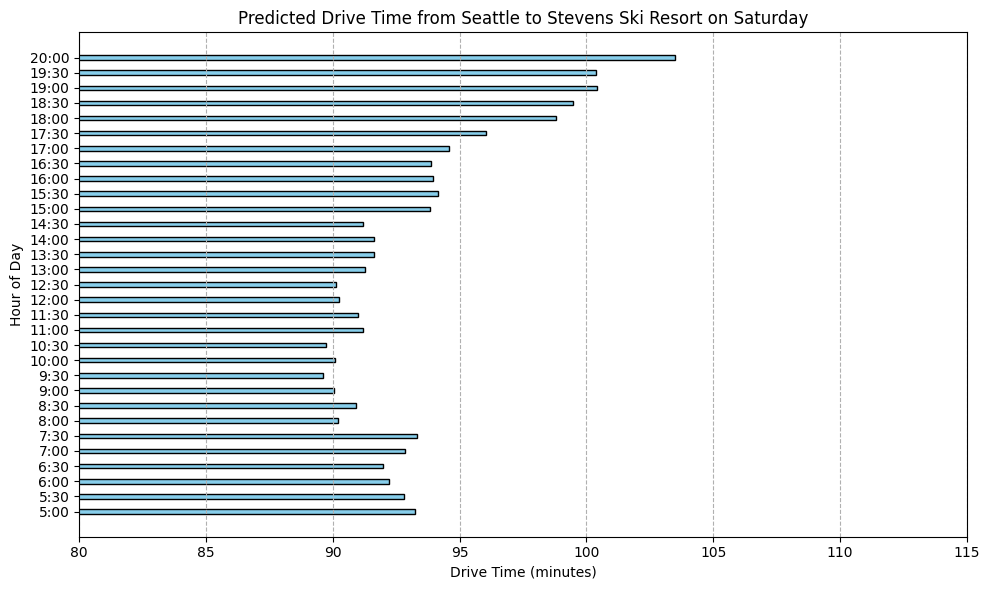

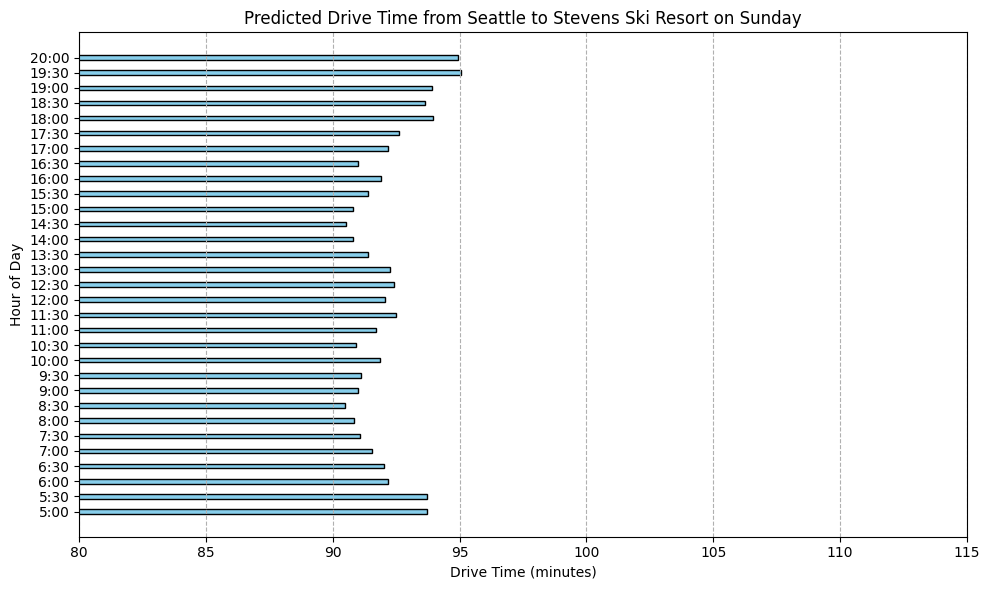

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'model' is your trained Random Forest model

# Generate prediction grid
hours = np.arange(5, 20.5, 0.5)  # From 5 AM to 8 PM, in 30-minute intervals
days_of_week = np.arange(7)  # 0 = Monday, 6 = Sunday

# Placeholder for predictions
predictions = np.zeros((len(days_of_week), len(hours)))

# Day names for titles
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert hours to formatted strings (e.g., '6:00', '6:30')
formatted_hours = [f"{int(hour)}:{'00' if hour % 1 == 0 else '30'}" for hour in hours]

# Predict drive time for each day and hour
for day in days_of_week:
    for i, hour in enumerate(hours):
        # Predict drive time
        prediction = model.predict([[day, hour]])
        predictions[day, i] = prediction

# Plotting
for day in days_of_week:
    plt.figure(figsize=(10, 6))
    plt.barh(formatted_hours, predictions[day], height=0.3, color='skyblue', edgecolor='black')
    
    plt.title(f'Predicted Drive Time from Seattle to Stevens Ski Resort on {day_names[day]}')
    plt.ylabel('Hour of Day')
    plt.xlabel('Drive Time (minutes)')
    plt.yticks(formatted_hours)
    
    plt.xlim(80, 115)  # Set the x-axis to range from 80 to 115 minutes
    plt.grid(axis='x', linestyle='--')
    plt.tight_layout()  # Adjust the layout to make sure everything fits without overlap
    plt.show()


In [65]:
# Save the graphs
import os

# Directory where images will be saved
image_dir = "drive_time_charts"
os.makedirs(image_dir, exist_ok=True)

# Plotting and saving graphs
for day in days_of_week:
    plt.figure(figsize=(10, 6))
    plt.barh(formatted_hours, predictions[day], height=0.3, color='skyblue', edgecolor='black')
    
    plt.title(f'Predicted Drive Time from Seattle to Stevens Ski Resort on {day_names[day]}')
    plt.ylabel('Hour of Day')
    plt.xlabel('Drive Time (minutes)')
    plt.yticks(formatted_hours)
    
    plt.xlim(80, 115)
    plt.grid(axis='x', linestyle='--')
    plt.tight_layout()

    # Save the figure
    fig_filename = os.path.join(image_dir, f"drive_time_{day_names[day].lower()}.png")
    plt.savefig(fig_filename)
    plt.close()


In [66]:
# Create the markdown file
markdown_content = """---
layout: post
title: "Predicted Drive Times"
date: 2024-03-30
categories: analysis
---

# Predicted Drive Times from Seattle to Stevens Ski Resort

Here are the predicted drive times for each day of the week:
"""

for day_name in day_names:
    markdown_content += f"\n![Predicted Drive Time on {day_name}](/assets/images/drive_time_charts/drive_time_{day_name.lower()}.png)"

# Save the Markdown content to a file
md_filename = "predicted_drive_times.md"
with open(md_filename, "w") as file:
    file.write(markdown_content)
